## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
import glob
train_path = glob.glob("/content/drive/My Drive/Complete Projects/Cotton-Disease-Prediction-Deep-Learning-master/Dataset/Train")
valid_path = glob.glob("/content/drive/My Drive/Complete Projects/Cotton-Disease-Prediction-Deep-Learning-master/Dataset/Test")


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
# useful for getting number of classes
folders = glob.glob('/content/drive/My Drive/Complete Projects/Cotton-Disease-Prediction-Deep-Learning-master/Dataset/Train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Complete Projects/Cotton-Disease-Prediction-Deep-Learning-master/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1961 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Complete Projects/Cotton-Disease-Prediction-Deep-Learning-master/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
62/62 [==============================] - 604s 9s/step - loss: 2.7456 - accuracy: 0.4095 - val_loss: 1.0613 - val_accuracy: 0.5283
Epoch 2/20
62/62 [==============================] - 38s 619ms/step - loss: 0.9600 - accuracy: 0.6079 - val_loss: 0.9997 - val_accuracy: 0.5755
Epoch 3/20
62/62 [==============================] - 37s 599ms/step - loss: 0.8773 - accuracy: 0.6456 - val_loss: 0.7913 - val_accuracy: 0.6604
Epoch 4/20
62/62 [==============================] - 38s 620ms/step - loss: 0.9459 - accuracy: 0.6313 - val_loss: 1.2365 - val_accuracy: 0.5943
Epoch 5/20
62/62 [==============================] - 38s 607ms/step - loss: 0.7315 - accuracy: 0.7027 - val_loss: 0.7508 - val_accuracy: 0.6887
Epoch 6/20
62/62 [==============================] - 39s 622ms/step - loss: 0.8844 - accuracy: 0.6476 - val_loss: 1.6573 - val_accuracy: 0.5283
Epoch 7/20
62/62 [==============================] - 37s 604ms/step - loss: 1.3144 - accuracy: 0.5971 - val_loss: 0.8352 - val_accuracy: 0.6887
E

In [16]:
import matplotlib.pyplot as plt

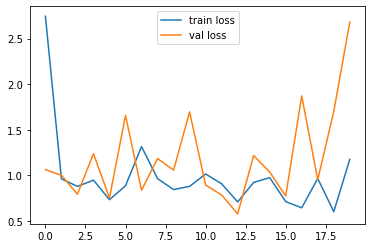

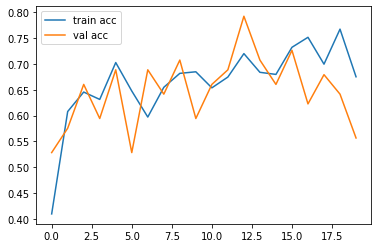

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Complete Projects/Cotton-Disease-Prediction-Deep-Learning-master/model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [19]:
y_pred = model.predict(test_set)

In [20]:
y_pred

array([[1.19729378e-07, 2.20915698e-03, 2.02060733e-02, 9.77584660e-01],
       [1.72898524e-07, 8.53429228e-05, 4.06059265e-01, 5.93855262e-01],
       [3.54341489e-09, 1.81871802e-02, 4.59185685e-05, 9.81766880e-01],
       [6.59239419e-08, 2.98719015e-03, 1.75147454e-06, 9.97010946e-01],
       [2.47679655e-09, 1.75433084e-02, 4.21182805e-04, 9.82035458e-01],
       [7.60754466e-01, 1.91532716e-03, 2.24992052e-01, 1.23381279e-02],
       [1.00343778e-08, 1.29375532e-02, 7.70293467e-04, 9.86292124e-01],
       [9.47289228e-01, 3.45051708e-03, 9.51623661e-04, 4.83085923e-02],
       [1.53589905e-08, 8.70754197e-03, 1.87729340e-04, 9.91104662e-01],
       [8.97835662e-07, 3.46370251e-03, 9.42856848e-01, 5.36784530e-02],
       [1.13439306e-07, 7.35660493e-02, 1.47581577e-05, 9.26419079e-01],
       [6.94587055e-09, 2.26130765e-02, 2.07562887e-04, 9.77179348e-01],
       [7.48021804e-08, 1.87893674e-01, 2.27891127e-04, 8.11878324e-01],
       [1.58388758e-09, 7.50981087e-07, 9.98207211e

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([3, 3, 3, 3, 3, 0, 3, 0, 3, 2, 3, 3, 3, 2, 2, 3, 0, 3, 3, 3, 2, 2,
       3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 2, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 3,
       3, 3, 3, 3, 3, 0, 1, 2, 3, 0, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0,
       3, 0, 2, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3])

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('/content/drive/My Drive/Complete Projects/Cotton-Disease-Prediction-Deep-Learning-master/model_resnet50.h5')

In [25]:
test_set

In [26]:
img=image.load_img('/content/drive/MyDrive/Complete Projects/Cotton-Disease-Prediction-Deep-Learning-master/1.jpg', target_size=(224,224))

In [27]:
x=image.img_to_array(img)
x

array([[[ 99.,  82.,  72.],
        [107.,  90.,  80.],
        [105.,  88.,  78.],
        ...,
        [178., 174., 171.],
        [179., 175., 172.],
        [191., 187., 184.]],

       [[101.,  84.,  74.],
        [113.,  96.,  86.],
        [124., 107.,  97.],
        ...,
        [145., 141., 138.],
        [188., 184., 181.],
        [186., 182., 179.]],

       [[120., 103.,  93.],
        [103.,  86.,  76.],
        [128., 111., 101.],
        ...,
        [162., 158., 155.],
        [175., 171., 168.],
        [183., 179., 176.]],

       ...,

       [[175., 210., 126.],
        [175., 210., 126.],
        [175., 210., 126.],
        ...,
        [ 50.,  43.,  33.],
        [ 59.,  52.,  42.],
        [165., 135.,  97.]],

       [[173., 208., 124.],
        [173., 208., 124.],
        [173., 208., 124.],
        ...,
        [ 80.,  73.,  63.],
        [ 71.,  64.,  54.],
        [183., 149., 111.]],

       [[169., 203., 126.],
        [171., 206., 126.],
        [173., 2

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[8.4022387e-05, 5.2521962e-21, 9.9991596e-01, 8.6219297e-21]],
      dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([2])

In [33]:
a==1

array([False])